Анализ датасета «titanic.csv»

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df_titanic = pd.read_csv('titanic.csv')
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


1. Рассчитать базовые статистики:
Вычислите средний возраст пассажиров, медиану, стандартное отклонение и
размах. Выведите эти значения.


In [5]:
avg_age = df_titanic['Age'].mean()
f'Средний возраст пассажиров: {avg_age}'

'Средний возраст пассажиров: 29.471443066516347'

In [6]:
median_age = df_titanic['Age'].median()
f'Медиана возраста пассажиров: {median_age}'

'Медиана возраста пассажиров: 28.0'

In [7]:
std_age = df_titanic['Age'].std()
f'Стандартное отклонение возраста пассажиров: {std_age}'

'Стандартное отклонение возраста пассажиров: 14.121908405462555'

In [12]:
delta_age = df_titanic['Age'].max() - df_titanic['Age'].min()
f'Размах возраста пассажиров: {delta_age}'

'Размах возраста пассажиров: 79.58'

2. Определить выживаемость:
Рассчитайте долю выживших (столбец Survived) относительно общего числа
пассажиров. Выведите результат в процентах.


In [23]:
survival_rate = (df_titanic['Survived'] == 1).sum() * 100 / df_titanic['Survived'].count()
f'Доля выживших равна: {survival_rate} процентов'

'Доля выживших равна: 38.55693348365276 процентов'

3. Найти пассажиров, выживших в третьем классе, которые путешествовали
без родственников


In [28]:
df_titanic[(df_titanic['Pclass'] == 3) & (df_titanic['Parents/Children Aboard'] == False) & (df_titanic['Siblings/Spouses Aboard'] == False)]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
12,0,3,Mr. William Henry Saundercock,male,20.0,0,0,8.0500
14,0,3,Miss. Hulda Amanda Adolfina Vestrom,female,14.0,0,0,7.8542
...,...,...,...,...,...,...,...,...
874,0,3,Mr. Kristo Laleff,male,23.0,0,0,7.8958
877,0,3,Mr. Johann Markun,male,33.0,0,0,7.8958
878,0,3,Miss. Gerda Ulrika Dahlberg,female,22.0,0,0,10.5167
880,0,3,Mr. Henry Jr Sutehall,male,25.0,0,0,7.0500


4. Распределение классов:
Постройте гистограмму распределения пассажиров по классу (Pclass):
посчитайте, сколько в каждом классе было пассажиров и отобразите это
графически.


<function matplotlib.pyplot.show(close=None, block=None)>

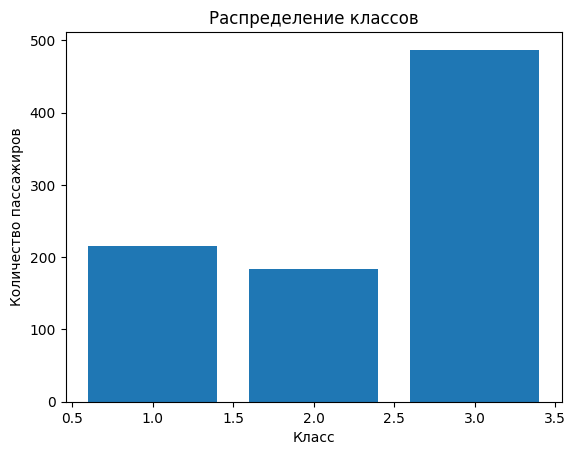

In [112]:
x = df_titanic['Pclass'].unique()
y = df_titanic.groupby('Pclass').count().iloc[:,0]
x.sort()

plt.bar(x, y)
plt.title('Распределение классов')
plt.xlabel('Класс')
plt.ylabel('Количество пассажиров')
plt.show

5. Определить пассажиров, которые либо заплатили больше 100 за билет,
либо были в первом классе, но не выжили


In [124]:
df_titanic[(df_titanic['Fare'] > 100) | ((df_titanic['Pclass'] == 1) & (df_titanic['Survived'] == 0))]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
27,0,1,Mr. Charles Alexander Fortune,male,19.0,3,2,263.0000
30,0,1,Don. Manuel E Uruchurtu,male,40.0,0,0,27.7208
31,1,1,Mrs. William Augustus (Marie Eugenie) Spencer,female,48.0,1,0,146.5208
34,0,1,Mr. Edgar Joseph Meyer,male,28.0,1,0,82.1708
...,...,...,...,...,...,...,...,...
811,0,1,Mr. Richard Fry,male,39.0,0,0,0.0000
818,0,1,Jonkheer. John George Reuchlin,male,38.0,0,0,0.0000
852,1,1,Mrs. George Dennick (Mary Hitchcock) Wick,female,45.0,1,1,164.8667
863,0,1,Mr. Washington Augustus II Roebling,male,31.0,0,0,50.4958


6. Распределение выживаемости по полу:
Постройте столбчатую диаграмму, показывающую выживаемость пассажиров
(сгруппированных по полу - колонка Sex): посчитайте, сколько пассажиров
выжило и визуально отобразите это с учетом их пола.
Указание: изучите метод groupby() у объектов DataFrame


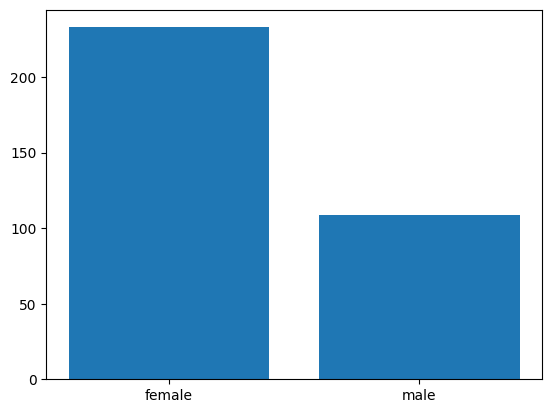

In [168]:
group_sex = df_titanic[df_titanic['Survived'] == 1].groupby('Sex').count().iloc[:,0]
y = group_sex.to_list()
x = group_sex.keys()

plt.bar(x, y)
plt.show()

7. Вывести пассажиров, которые либо путешествовали с более чем двумя
родственниками, либо находились в первом классе, но при этом
заплатили за билет меньше 20


In [176]:
df_titanic[(df_titanic['Siblings/Spouses Aboard'] + df_titanic['Parents/Children Aboard'] > 2) | ((df_titanic['Pclass'] == 1) & (df_titanic['Fare'] < 20)) ]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
13,0,3,Mr. Anders Johan Andersson,male,39.0,1,5,31.2750
16,0,3,Master. Eugene Rice,male,2.0,4,1,29.1250
24,0,3,Miss. Torborg Danira Palsson,female,8.0,3,1,21.0750
25,1,3,Mrs. Carl Oscar (Selma Augusta Emilia Johansso...,female,38.0,1,5,31.3875
...,...,...,...,...,...,...,...,...
854,1,3,Mrs. Solomon (Latifa Qurban) Baclini,female,24.0,0,3,19.2583
859,0,3,Miss. Dorothy Edith Sage,female,14.0,8,2,69.5500
868,0,1,Mr. Frans Olof Carlsson,male,33.0,0,0,5.0000
881,0,3,Mrs. William (Margaret Norton) Rice,female,39.0,0,5,29.1250


8. Различные зависимости:
a. Построить точечный график, отображающий распределение стоимости
билетов (Fare) в зависимости от возраста (Age) для выживших и
погибших пассажиров. Использовать разные цвета для обозначения
выживших и погибших




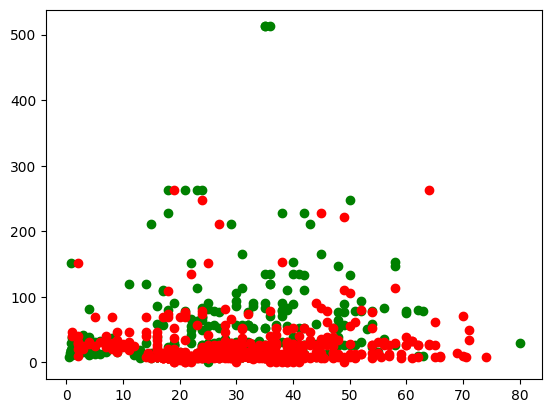

In [183]:
mask_survived = df_titanic['Survived'] == 1

x_survived = df_titanic[mask_survived]['Age']
y_survived = df_titanic[mask_survived]['Fare']

x_not_survived = df_titanic[~mask_survived]['Age']
y_not_survived = df_titanic[~mask_survived]['Fare']

plt.scatter(x_survived, y_survived, color = 'green')
plt.scatter(x_not_survived, y_not_survived, color = 'red')
plt.show()

b. Построение гистограмму средней стоимости билета (Fare) в зависимости от класса билета (Pclass)

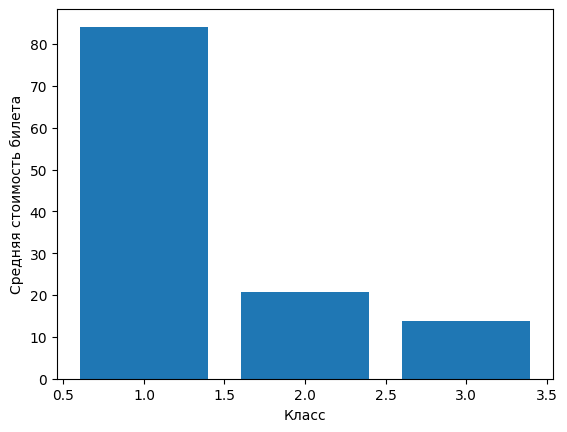

In [188]:
avg_fare_class = df_titanic.groupby('Pclass')['Fare'].mean()

x = avg_fare_class.keys()
y = avg_fare_class.to_list()

plt.bar(x, y)
plt.xlabel('Класс')
plt.ylabel('Средняя стоимость билета')
plt.show()

c. *** Постройте линейный график изменения стоимости билета в зависимости от возраста

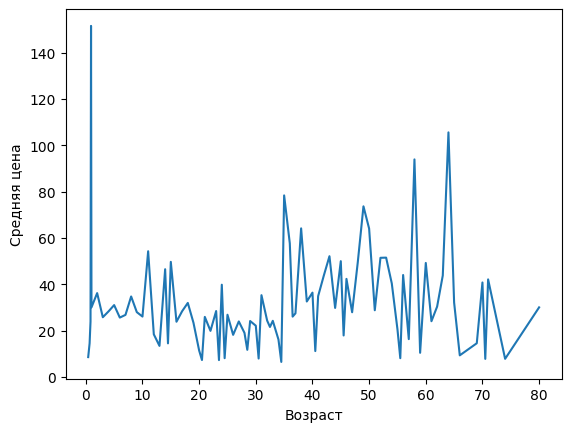

In [191]:
group_age = df_titanic.groupby('Age')['Fare'].mean()

x = group_age.keys()
y = group_age.to_list()



plt.plot(x, y)
plt.xlabel('Возраст')
plt.ylabel('Средняя цена')
plt.show()

9. Найти пассажиров, не входящих в возрастной диапазон от 18 до 50 лет и
выживших

In [194]:
df_titanic[((df_titanic['Age'] < 18) | (df_titanic['Age'] > 50)) & (df_titanic['Survived'] == 1)]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708
10,1,3,Miss. Marguerite Rut Sandstrom,female,4.0,1,1,16.7000
11,1,1,Miss. Elizabeth Bonnell,female,58.0,0,0,26.5500
15,1,2,Mrs. (Mary D Kingcome) Hewlett,female,55.0,0,0,16.0000
22,1,3,Miss. Anna McGowan,female,15.0,0,0,8.0292
...,...,...,...,...,...,...,...,...
849,1,1,Miss. Mary Conover Lines,female,16.0,0,1,39.4000
853,1,1,Mr. Peter Denis Daly,male,51.0,0,0,26.5500
865,1,3,Master. Harold Theodor Johnson,male,4.0,1,1,11.1333
871,1,3,Miss. Adele Kiamie Najib,female,15.0,0,0,7.2250
